In [25]:
from zad1 import *
from zad2 import *
from zad3 import *
from zad4 import *
from Prim import *

   # Zadanie 1. - przykład wywołania


Zestaw 3, zadanie 1 - spójny losowy graf ważony:


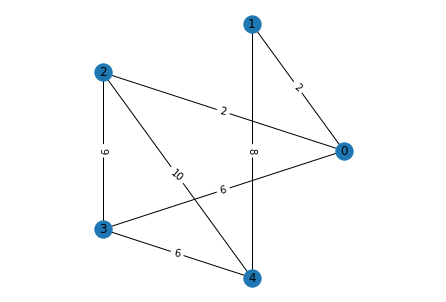

<Figure size 432x288 with 0 Axes>

In [43]:
print("\nZestaw 3, zadanie 1 - spójny losowy graf ważony:")
graph = create_rand_consistent_weighted_graph(5, 1, 10)
draw(graph)

# Zadanie 2. - przykład wywołania

In [44]:
print("\nZestaw 3, zadanie 2 - Dijkstra:")
g = graph
start_vertex = 3
distances, predecessors = dijkstra(g, start_vertex)
trails = get_trails(predecessors)
print('START: s = ' + str(start_vertex))
for vertex, trail in zip(distances.keys(), trails.keys()):
    print(f"d({vertex}) = {distances[vertex]} ==> {trails[trail]}")


Zestaw 3, zadanie 2 - Dijkstra:
START: s = 3
d(0) = 6 ==> [3, 0]
d(1) = 8 ==> [3, 0, 1]
d(2) = 8 ==> [3, 0, 2]
d(3) = 0 ==> [3]
d(4) = 6 ==> [3, 4]


# Zadanie 3. - przykład wywołania

In [45]:
print("\nZestaw 3, zadanie 3 - macierz odległości:")
distances_matrix = create_distances_matrix(graph)
for row in distances_matrix:
    print(*row, sep='\t')


Zestaw 3, zadanie 3 - macierz odległości:
0	2	2	6	10
2	0	4	8	8
2	4	0	8	10
6	8	8	0	6
10	8	10	6	0


# Zadanie 4. - przykład wywołania

In [46]:
distances_matrix = create_distances_matrix(graph)
print_matrix(distances_matrix)
graph_center = find_graph_center(distances_matrix)
minimax_graph_center = find_minimax_center(distances_matrix)
print(f'Centrum grafu to wierzcholek: {graph_center}')
print(f'Centrum minimax grafu to wierzcholek: {minimax_graph_center}')

0	2	2	6	10
2	0	4	8	8
2	4	0	8	10
6	8	8	0	6
10	8	10	6	0
Centrum grafu to wierzcholek: 0
Centrum minimax grafu to wierzcholek: 1


# Zadanie 5. - przykład wywołania

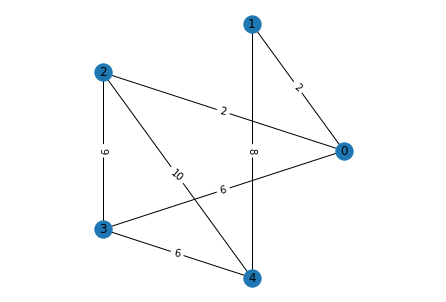

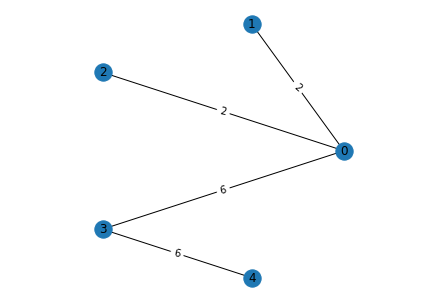

<Figure size 432x288 with 0 Axes>

In [47]:
adj_matrix = edges_and_vertices_to_adjacency_matrix(graph.get_edges(), 
                                                        graph.get_vertices())
    
weights_matrix = edges_and_vertices_to_weights_matrix(graph.get_edges(),
                                                          graph.get_vertices())
    
graphPrim = GraphPrim(adj_matrix, weights_matrix)
edgesPrim = find_spanning_tree(graphPrim, starting_vertex=0)
    
result_graph = convert_to_drawable_graph(graphPrim, edgesPrim)
   
draw(graph)    
draw(result_graph)